In [1]:
import os

ENDWITHS = 'pipeline'

NOTEBOOK_DIR = os.getcwd()

if not NOTEBOOK_DIR.endswith(ENDWITHS):
    raise ValueError(f"Not in correct dir, expect end with {ENDWITHS}, but got {NOTEBOOK_DIR} instead")

BASE_DIR = os.path.join(NOTEBOOK_DIR, '..', '..')

In [2]:
from ultralytics import YOLO
from YoloSeg import YoloSeg, plot_patch, plot_image
from MangaOCRModel import MangaOCRModel
from ElanMtJaEnTranslator import ElanMtJaEnTranslator
import cv2
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
import numpy as np
from math import ceil, floor

In [3]:
YOLO_MODEL_PATH = os.path.join(BASE_DIR, 'best.pt')
EX_IMG_PATH = os.path.join(BASE_DIR, 'nikke/1.jpeg')

In [4]:
yolo_model = YOLO(YOLO_MODEL_PATH)
results = yolo_model.predict(source=EX_IMG_PATH)


image 1/1 /home/zendragonxxx/Documents/ZenDragonXXX/B3/Group Project/group-project-b3/code/pipeline/../../nikke/1.jpeg: 640x480 12 balloons, 171.0ms
Speed: 2.5ms preprocess, 171.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 480)


In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'balloon'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 25

In [6]:
result = results[0]

In [7]:
image_rgb = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)

boxes = result.boxes.xyxy.cpu().numpy()
masks_xy = result.masks.xy  
box_ids = range(len(boxes))

print(f"Detected {len(boxes)} objects.")
print(f"Detected {len(masks_xy)} mask.")

Detected 12 objects.
Detected 12 mask.


In [8]:
image_rgb_array = np.array(image_rgb)
cropped_image_list = []

for box in boxes:
    cropped_image = image_rgb_array[floor(box[1]):ceil(box[3]), floor(box[0]):ceil(box[2]), :]
    cropped_image_list.append(cropped_image)

text_ocr_list = []

manga_ocr_model = MangaOCRModel()
manga_ocr_model.load_model()

for cropped_img in cropped_image_list:
    text = manga_ocr_model.predict(cropped_img)
    text_ocr_list.append(text)

for i, text in enumerate(text_ocr_list):
    print(f"ID {box_ids[i]}: {text}")

2025-11-14 03:05:43.563 | INFO     | manga_ocr.ocr:__init__:16 - Loading OCR model from kha-white/manga-ocr-base
2025-11-14 03:05:46.378 | INFO     | manga_ocr.ocr:__init__:28 - Using CPU
2025-11-14 03:05:46.840 | INFO     | manga_ocr.ocr:__init__:35 - OCR ready


ID 0: １０年か．．．思えば長い戦いだったのぅ．．
ID 1: そうか．．．達者でな？
ID 2: ついにクイーンを討ち果たした祝杯だに！！委せにぃラプンツェル！！
ID 3: スイホワイトも何しとるだに！！こっちゃ来て一緒に名だ！！
ID 4: ３周年イベントも最高でしたね！！
ID 5: こんなに乱れてはしたない．．．！！
ID 6: ダンゴムシ美味しい！！
ID 7: いやぁ〜〜！！今回の私らも大活躍だったにぃ！！
ID 8: こんなに乱れてはしたない．．．！！
ID 9: ．．．さてこれから何をしようかねラプンツェルはやりたいことはあるのかね？
ID 10: いいけど．．．あっそ、なあのにお兄ちゃんなんてしまいます！！
ID 11: セックス！！！


In [9]:
model_trans = ElanMtJaEnTranslator()
model_trans.load_model()

text_translated_list = []

for text in text_ocr_list:
    text_translated = model_trans.predict(text)
    text_translated_list.append(text_translated)

print("\\n--- Translation's results ---")
for i, (ocr, trans) in enumerate(zip(text_ocr_list, text_translated_list)):
    print(f"Bbox ID: {box_ids[i]}")
    print(f"  - OCR: {ocr}")
    print(f"  - Translation: {trans}\\n")

Device set to use cpu


\n--- Translation's results ---
Bbox ID: 0
  - OCR: １０年か．．．思えば長い戦いだったのぅ．．
  - Translation: It's been ten years... I thought it was a long battle.\n
Bbox ID: 1
  - OCR: そうか．．．達者でな？
  - Translation: Yes ... he's a master?\n
Bbox ID: 2
  - OCR: ついにクイーンを討ち果たした祝杯だに！！委せにぃラプンツェル！！
  - Translation: At last, it's a celebratory cup that killed the Queen!! Let's give it to Rapunzel!!\n
Bbox ID: 3
  - OCR: スイホワイトも何しとるだに！！こっちゃ来て一緒に名だ！！
  - Translation: What do you want to do with water whites?! Come and come together!\n
Bbox ID: 4
  - OCR: ３周年イベントも最高でしたね！！
  - Translation: The third anniversary event was also great, wasn't it?!\n
Bbox ID: 5
  - OCR: こんなに乱れてはしたない．．．！！
  - Translation: I wasn't going to be so disturbed...!\n
Bbox ID: 6
  - OCR: ダンゴムシ美味しい！！
  - Translation: Dangomushi is delicious!!\n
Bbox ID: 7
  - OCR: いやぁ〜〜！！今回の私らも大活躍だったにぃ！！
  - Translation: No!! This time we were also very active!!!\n
Bbox ID: 8
  - OCR: こんなに乱れてはしたない．．．！！
  - Translation: I wasn't going to be so disturbed...!\n
Bb

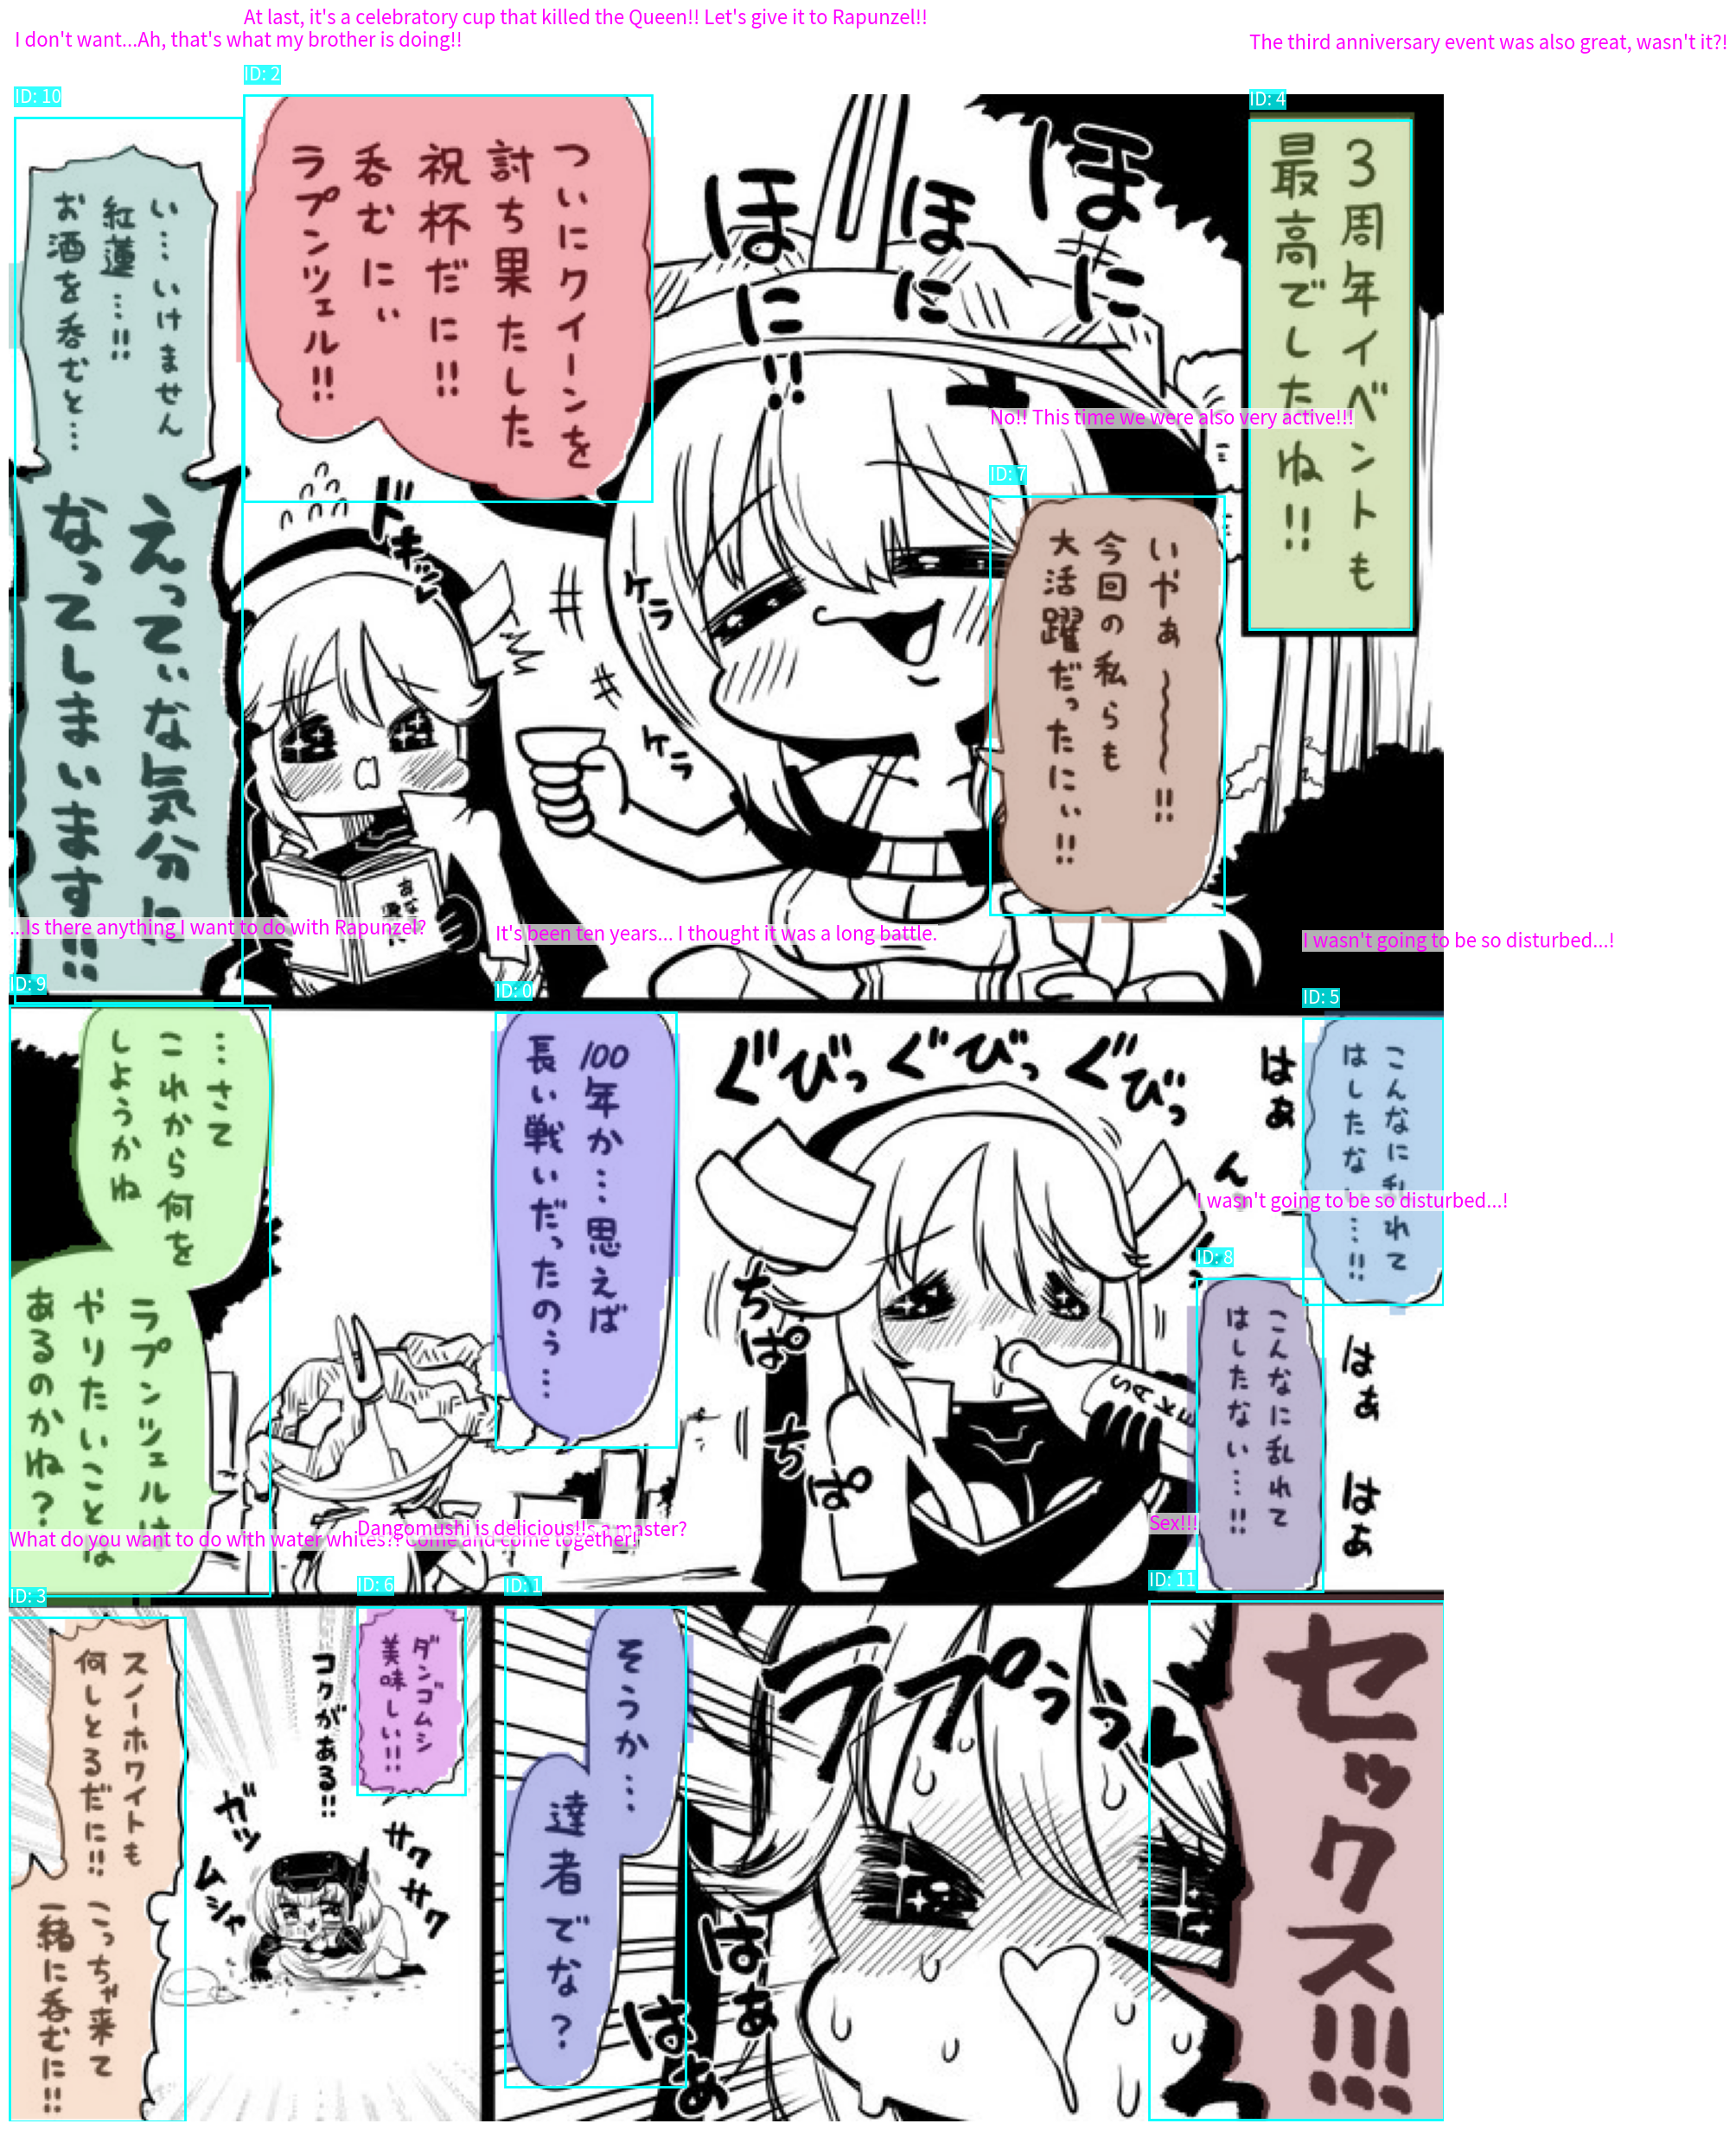

In [10]:
image_with_masks = image_rgb.copy()
overlay = image_rgb.copy()

for i, mask_points in enumerate(masks_xy):
    color = np.random.randint(50, 255, size=3).tolist()  # Random color
    cv2.fillPoly(overlay, [np.array(mask_points, dtype=np.int32)], color)

alpha = 0.4  
image_with_masks = cv2.addWeighted(overlay, alpha, image_with_masks, 1 - alpha, 0)

ratio = image_with_masks.shape[1] / image_with_masks.shape[0]
width = 20  
height = width / ratio

fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.imshow(image_with_masks)

for i, box in enumerate(boxes):
    box_id = box_ids[i]
    trans_text = text_translated_list[i]

    # 1. bounding box
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                         linewidth=2, edgecolor='cyan', facecolor='none')
    ax.add_patch(rect)

    # 2. Assign ID for bounding box at top-left
    ax.text(box[0], box[1] - 5, f'ID: {box_id}',
            fontsize=15, color='white',
            bbox=dict(facecolor='cyan', alpha=0.8, pad=0.5, edgecolor='none'),
            verticalalignment='bottom')

    # 3. Assign translation above bounding box
    ax.text(box[0], box[1] - 30, trans_text,
            fontsize=16, color='magenta',
            verticalalignment='bottom',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.5, edgecolor='none'))

ax.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.font_manager as fm
# --- AUTOMATIC FONT FINDING ---
# Find a common sans-serif font on Linux.
# It will try to find each font in the list in turn.
font_names = ['DejaVu Sans', 'Liberation Sans', 'Arial', 'Helvetica']
system_font_path = ""
for font_name in font_names:
    try:
        # Use matplotlib to find the absolute path of the font
        system_font_path = fm.findfont(fm.FontProperties(family=font_name))
        print(f"Found system font: '{font_name}' at {system_font_path}")
        break # Stop when first font is found
    except:
        continue

if not system_font_path:
    print("WARNING: No matching system font found. Will use Pillow's default font (low quality).")
    # If not found, Option 2 will be used as a fallback
    FONT_PATH = ""
else:
    FONT_PATH = system_font_path

Found system font: 'DejaVu Sans' at /home/zendragonxxx/miniconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [12]:
EROSION_PIXELS = 8
TEXT_COLOR = (0, 0, 0) # Black

def generate_lines(draw, text, font, max_width):
    """
    Hàm xuống dòng thông minh. Nếu một từ quá dài, nó sẽ tự động ngắt từ đó.
    Đây là chìa khóa để tận dụng tối đa không gian chiều ngang.
    """
    lines = []
    words = text.split()
    
    current_line = ""
    for word in words:
        # Xử lý trường hợp từ đơn lẻ dài hơn cả chiều rộng cho phép
        if draw.textbbox((0,0), word, font=font)[2] > max_width:
            # Đẩy dòng hiện tại (nếu có) vào danh sách
            if current_line:
                lines.append(current_line.strip())
                current_line = ""
            
            # Bắt đầu ngắt từ dài
            temp_word = ""
            for char in word:
                if draw.textbbox((0,0), temp_word + char, font=font)[2] <= max_width:
                    temp_word += char
                else:
                    lines.append(temp_word)
                    temp_word = char
            current_line = temp_word # Phần còn lại của từ
            continue

        # Logic xuống dòng thông thường
        if not current_line:
             current_line = word
        elif draw.textbbox((0,0), current_line + " " + word, font=font)[2] <= max_width:
            current_line += " " + word
        else:
            lines.append(current_line.strip())
            current_line = word
            
    if current_line:
        lines.append(current_line.strip())
        
    return lines

def fit_text_in_bubble(draw, text, font_path, bounding_box, text_color):
    """
    Hàm tìm kích thước font lớn nhất có thể bằng cách ưu tiên xuống dòng trước,
    chỉ thu nhỏ font khi không thể tránh khỏi.
    """
    x, y, w, h = bounding_box
    if w <= 0 or h <= 0 or not font_path: return

    font_size = h
    final_lines = []
    final_font = None

    while font_size > 5:
        font = ImageFont.truetype(font_path, font_size)
        
        # 1. TẠO CÁC DÒNG TỐI ƯU cho kích thước font hiện tại
        lines = generate_lines(draw, text, font, w)
        
        # 2. KIỂM TRA CHIỀU CAO
        total_height = sum([draw.textbbox((0, 0), line, font=font)[3] for line in lines])
        
        if total_height <= h:
            # Vừa vặn! Đây là kích thước font tốt nhất.
            final_lines = lines
            final_font = font
            break 
        
        # Nếu không vừa, thu nhỏ font và thử lại
        font_size -= 2
    
    # Nếu không tìm được size phù hợp (vòng lặp kết thúc), dùng size cuối cùng
    if not final_font:
        final_font = ImageFont.truetype(font_path, font_size)
        final_lines = generate_lines(draw, text, final_font, w)

    # 3. VẼ KẾT QUẢ
    total_height = sum([draw.textbbox((0, 0), line, font=final_font)[3] for line in final_lines])
    current_y = y + (h - total_height) / 2
    
    for line in final_lines:
        line_height = draw.textbbox((0, 0), line, font=final_font)[3]
        line_width = draw.textbbox((0, 0), line, font=final_font)[2]
        current_x = x + (w - line_width) / 2
        draw.text((current_x, current_y), line, font=final_font, fill=text_color)
        current_y += line_height

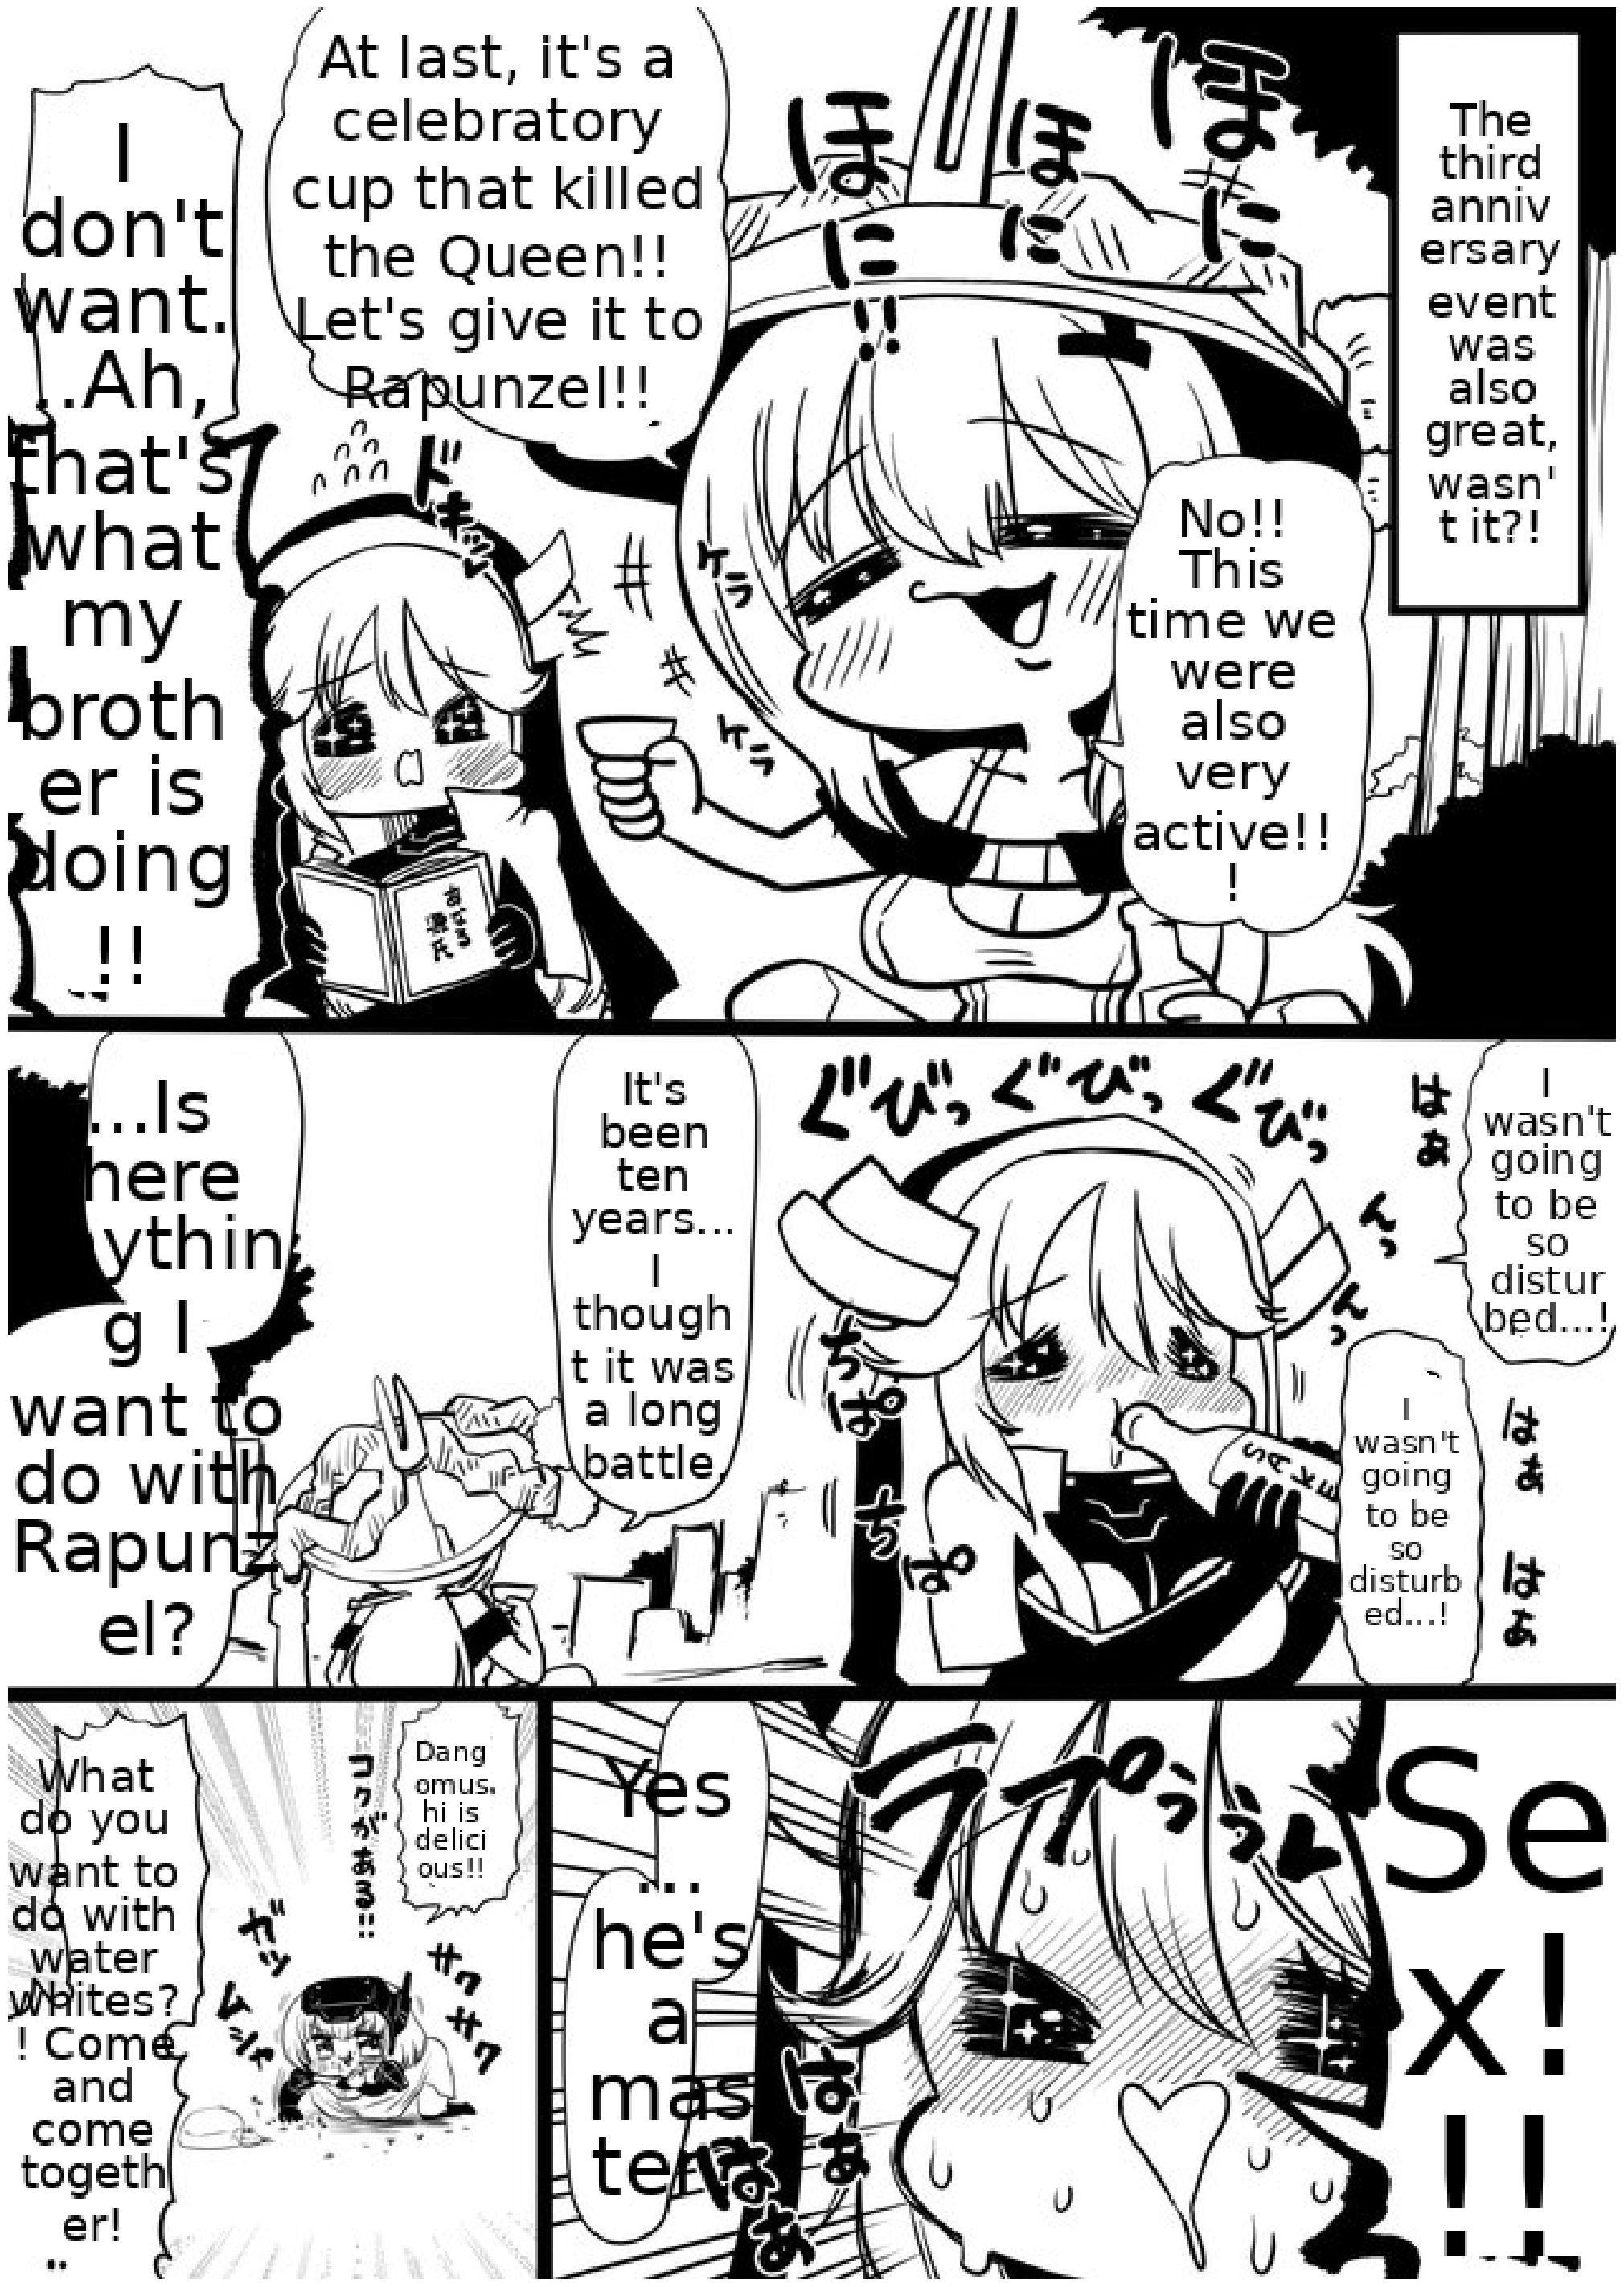

In [13]:
image_final = image_rgb.copy()

erosion_kernel = np.ones((2 * EROSION_PIXELS + 1, 2 * EROSION_PIXELS + 1), np.uint8)

for i, (box, mask_points, trans_text) in enumerate(zip(boxes, masks_xy, text_translated_list)):
    if not trans_text.strip(): continue

    # BƯỚC 1: Tạo mask nhị phân và co lại để tạo lề an toàn
    binary_mask = np.zeros(image_final.shape[:2], dtype=np.uint8)
    cv2.fillPoly(binary_mask, [np.array(mask_points, dtype=np.int32)], 255)
    eroded_mask = cv2.erode(binary_mask, erosion_kernel, iterations=1)
    
    # BƯỚC 2: Tẩy trắng vùng an toàn bằng cách tô màu trắng tinh
    contours, _ = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image_final, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    
    # BƯỚC 3: Tìm hình chữ nhật bao quanh vùng đã tẩy trắng
    if contours:
        # Đây là hình chữ nhật mà chúng ta sẽ điền chữ vào
        text_area_bbox = cv2.boundingRect(contours[0])
        
        # BƯỚC 4: Chuyển sang PIL và gọi hàm fit_text_in_bubble
        pil_image = Image.fromarray(image_final)
        draw = ImageDraw.Draw(pil_image)
        
        # Gọi hàm với text_area_bbox
        fit_text_in_bubble(draw, trans_text, FONT_PATH, text_area_bbox, TEXT_COLOR)
        
        image_final = np.array(pil_image)

ratio = image_final.shape[1] / image_final.shape[0]
width = 20
height = width / ratio

fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.imshow(image_final)
ax.axis('off')
plt.tight_layout(pad=0)
plt.show()